# PyQt5 디지털 시계 만들기

* 난이도 : ★★★☆☆☆☆☆☆☆
* 필요라이브러리: PyQt5, datetime, sys


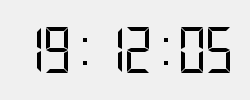


### 필요한 라이브러리 임포트

In [ ]:
import sys
from PyQt5 import QtWidgets
from PyQt5 import QtCore

class MyClock(QtWidgets.QWidget):
    '''QWidget 을 상속받은 시계 본체 클래스'''
    def __init__(self):
        '''생성자'''
        # QWidget 의 생성자 호출
        super().__init__()

         # 윈도우 타이틀바
        self.setWindowTitle("시계")

        # 위젯 생성 함수 호출
        self.initWidgets()

        # 윈도우 크기 고정
        self.setFixedSize(250, 100)

        # 메인윈도우 타이틀바 제거
        self.setWindowFlags(QtCore.Qt.FramelessWindowHint)

        # 윈도우 화면 표시
        self.show()

    def keyPressEvent(self, e):
        '''키보드가 입력되면 호출 되는 오버라이딩 함수

        Args:
            e (PyQt5.QtGui.QKeyEvent) : 키보드 이벤트

        참조: https://www.riverbankcomputing.com/static/Docs/PyQt5/api/qtgui/qkeyevent.html?highlight=qkeyevent#PyQt5.QtGui.QKeyEvent
        '''

        # 입력된 키보드의 키가 esc 키면 프로그램 종료
        if e.key() == QtCore.Qt.Key_Escape:
            self.close()

    def mousePressEvent(self, e):
        '''마우스가 클릭 되면 호출되는 오버라이딩 함수

        Args:
            e (PyQt5.QtGui.QMouseEvent) : 마우스 이벤트

        참조: https://www.riverbankcomputing.com/static/Docs/PyQt5/api/qtgui/qmouseevent.html?highlight=globalpos
        '''
        
        # 마우스 왼쪽 버튼이 클릭 되었다면
        if e.button() == QtCore.Qt.LeftButton:
            # 클릭되었다고 변수 설정
            self.mouseClick = True
            # 현재 글로벌 위치를 oldPos 에 저장해놓음
            self.oldPos = e.globalPos()
            print(self.oldPos)

    def mouseReleaseEvent(self, e):
        '''마우스 클릭이 해제되면 호출되는 오버라이딩 함수
        Args:
            e (PyQt5.QtGui.QMouseEvent) : 마우스 이벤트
        '''

        # 클릭된 변수를 False 로 설정
        self.mouseClick = False

    def mouseMoveEvent(self, e):
        '''마우스 이동시 호출되는 오버라이딩 함수
        Args:
            e (PyQt5.QtGui.QMouseEvent) : 마우스 이벤트
        '''

        # 마우스가 클릭된 상태에서만 
        if self.mouseClick:
            # 현재 마우스 좌표에서 이전 마우스 좌표를 빼 이동거리를 계산합니다.
            delta = QtCore.QPoint (e.globalPos() - self.oldPos)
            # 이동거리만큼 윈도우를 이동시킵니다.
            self.move(self.x() + delta.x(), self.y() + delta.y())
            # oldPos 에 현재 마우스 좌표를 다시 기억합니다.
            self.oldPos = e.globalPos()

    def initWidgets(self):
        '''위젯 생성 함수'''

        # 세로 레이아웃 위젯 생성
        self.layout = QtWidgets.QVBoxLayout()

        # 시계를 표시할 QLCD 위젯 생성
        self.lcd = QtWidgets.QLCDNumber()

        # LCD 숫자를 Flat 하게 설정
        self.lcd.setSegmentStyle(QtWidgets.QLCDNumber.Flat)

        # LCD 숫자의 자리수 설정 (디폴트는 4자리)
        self.lcd.setDigitCount(8)

        # LCD 주변 사각형 프레임 제거
        self.lcd.setFrameStyle(QtWidgets.QFrame.NoFrame)
        
        #self.lcd.setStyleSheet("color:black")

        # 타이머 생성
        self.timer = QtCore.QTimer()
        # 타이머 시그널을 show_time 슬롯에 연결
        self.timer.timeout.connect(self.show_time)
        # 타이머를 1초마다 동작
        self.timer.start(1000)

        # 시작시 1초 후 타이머가 발생되니 시계의 초기값을 표시하기 위해 함수 직접 호출
        self.show_time()

        # LCD 위젯을 Vbox 레이아웃 위젯에 추가
        self.layout.addWidget(self.lcd)

        # 메인 레이아웃에 vbox 레이아웃 설정
        self.setLayout(self.layout)

    def show_time(self):
        '''타이머 발생시 연결될 슬롯 함수'''

        # 현재 시간을 구합니다.
        time = QtCore.QTime.currentTime()
        
        # 현재 시간을 00:00:00 형태로 포맷팅 하여 currentTime 변수에 문자열로 저장합니다.
        self.currentTime = time.toString('hh:mm:ss')

        # 현재 시간을 LCD 에 출력합니다.
        self.lcd.display(self.currentTime)


if __name__ == '__main__':
    # 어플리케이션 객체를 생성합니다.
    app = QtWidgets.QApplication(sys.argv)

    # MyClock 을 생성하여 ex에 저장합니다.
    ex = MyClock()

    # 어플리케이션을 실행합니다.
    sys.exit(app.exec_())